In [1]:
import pandas as pd
import os
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_absolute_error, mean_squared_error, root_mean_squared_error, r2_score

C:\Users\applepy\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [139]:
# !pip install TensorBoard 

In [140]:
# Set the random seed for reproducibility
np.random.seed(42)
tf.random.set_seed(42)

In [141]:
df = pd.read_csv('dataset/X_train.csv').low_bnd.cumsum()

In [142]:
def create_sequences(data, n):
    """
    Create sequences of length n from the input time series data.
    
    Parameters:
    data (numpy array): The input time series data.
    n (int): The length of each sequence.
    
    Returns:
    X (numpy array): The input sequences for training the LSTM.
    y (numpy array): The corresponding target values.
    """
    X, y = [], []
    for i in range(len(data) - n):
        X.append(data[i:i + n])
        y.append(data[i + n])
    return np.array(X), np.array(y)

In [143]:
n = 10
X, y = create_sequences(df, n)

In [144]:
X.shape, y.shape

((3194, 10), (3194,))

Train test split

In [145]:
CUT_OFF = int(X.shape[0] * .7)
X_train, X_test = X[:CUT_OFF], X[CUT_OFF:]
y_train, y_test = y[:CUT_OFF], y[CUT_OFF:]

In [46]:
def plot_predictions_with_metrics(y_test, y_preds):
    # Calculate error metrics
    mse = mean_squared_error(y_test, y_preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_preds)
    mae = mean_absolute_error(y_test, y_preds)

    # Plot the actual vs predicted values
    plt.figure(figsize=(12, 8))  # Set the figure size
    
    plt.plot(y_test, label='Actual Values', color='blue', linestyle='-', linewidth=2)  # Plot actual values
    plt.plot(y_preds, label='Predicted Values', color='red', linestyle='--', linewidth=2)  # Plot predicted values
    
    plt.title('Actual vs Predicted Values', fontsize=16)  # Set the title
    plt.xlabel('Time Steps', fontsize=14)  # Set the x-axis label
    plt.ylabel('Values', fontsize=14)  # Set the y-axis label
    
    plt.legend(loc='best')  # Add legend
    plt.grid(True)  # Add grid
    
    # Customize the ticks on the axes
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Add a background color
    plt.gca().set_facecolor('#f2f2f2')
    
    # Add a border
    for spine in plt.gca().spines.values():
        spine.set_edgecolor('gray')

    # Add text box with error metrics
    textstr = '\n'.join((
        f'Mean Squared Error (MSE): {mse:.4f}',
        f'Root Mean Squared Error (RMSE): {rmse:.4f}',
        f'R² Score: {r2:.4f}',
        f'Mean Absolute Error (MAE): {mae:.4f}'
    ))

    # Add the text box in the lower left
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    plt.text(0.05, 0.05, textstr, transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='bottom', bbox=props)
    
    plt.show()  # Display the plot

XGB

In [48]:
import lightgbm as lgbm

In [55]:
model = lgbm.LGBMRegressor(n_estimators=2000, random_state=42)

In [56]:
model.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000174 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 2235, number of used features: 10
[LightGBM] [Info] Start training from score 12.788313


LGBMRegressor(n_estimators=2000, random_state=42)

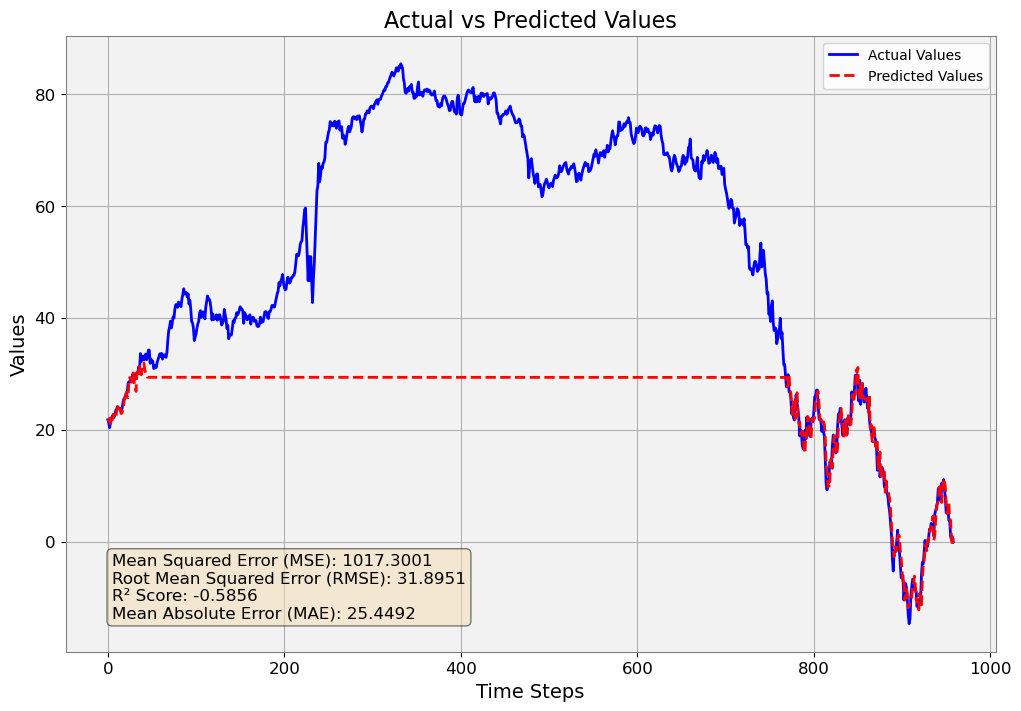

In [57]:
plot_predictions_with_metrics(y_test, model.predict(X_test))

LSTM

In [58]:
def create_vanilla_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, activation='relu', input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

In [59]:
input_shape = (X_train.shape[1], 1)
model = create_vanilla_lstm_model(input_shape)

In [60]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_3 (LSTM)               (None, 50)                10400     
                                                                 
 dense_3 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [61]:
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

Epoch 1/20
100/100 [==============================] - 1s 2ms/step - loss: 91.8968
Epoch 2/20
100/100 [==============================] - 0s 2ms/step - loss: 2.3049
Epoch 3/20
100/100 [==============================] - 0s 2ms/step - loss: 1.5732
Epoch 4/20
100/100 [==============================] - 0s 2ms/step - loss: 1.3531
Epoch 5/20
100/100 [==============================] - 0s 2ms/step - loss: 1.3767
Epoch 6/20
100/100 [==============================] - 0s 2ms/step - loss: 1.3535
Epoch 7/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2072
Epoch 8/20
100/100 [==============================] - 0s 2ms/step - loss: 1.2033
Epoch 9/20
100/100 [==============================] - 0s 2ms/step - loss: 1.3337
Epoch 10/20
100/100 [==============================] - 0s 2ms/step - loss: 1.1453
Epoch 11/20
100/100 [==============================] - 0s 2ms/step - loss: 1.1961
Epoch 12/20
100/100 [==============================] - 0s 2ms/step - loss: 1.1234
Epoch 13/20
100/100 [===

In [62]:
y_preds = model.predict(X_test)

30/30 [==============================] - 0s 1ms/step


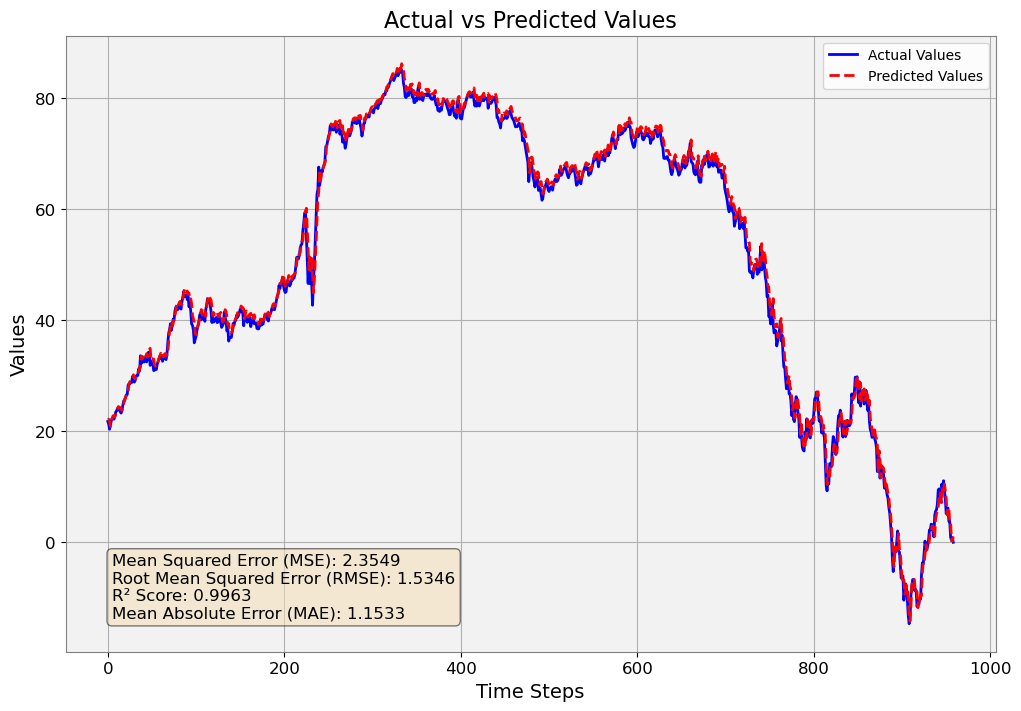

In [63]:
plot_predictions_with_metrics(y_test, y_preds)

LSTM attention

In [64]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Concatenate, Activation, Reshape, Permute, RepeatVector, Multiply, Lambda, Dropout, Layer
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import MeanAbsoluteError
from keras.layers import Dense, Flatten, Embedding, Bidirectional # CuDNNLSTM
import tensorflow.keras.backend as K
# from keras import Layer
from keras import initializers, regularizers, constraints
from keras import backend as K
from tensorflow.keras.optimizers import RMSprop, Adam, Nadam, SGD
from keras import initializers, regularizers, constraints
from keras import backend as K
from keras.layers import Layer, Input, Bidirectional, LSTM, Dense
from keras.models import Model
from keras.layers import BatchNormalization
# https://www.kaggle.com/qqgeogor/keras-lstm-attention-glove840b-lb-0-043

V1

In [66]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Activation, Reshape, Permute, RepeatVector, Multiply, Lambda
from tensorflow.keras.optimizers import RMSprop
import tensorflow.keras.backend as K

In [71]:

def create_network(input_shape, rnn_units=256, use_attention=True):
    """ Create the structure of the neural network """

    # Input layer for the continuous values sequence with shape (timesteps, features)
    inputs = Input(shape=(input_shape, 1))

    # LSTM layer with return_sequences=True to get the output of all timesteps
    x = LSTM(rnn_units, return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)

    if use_attention:
        # Second LSTM layer for attention mechanism
        x = LSTM(rnn_units, return_sequences=True)(x)
        x = BatchNormalization()(x)
        x = Dropout(0.2)(x)

        # Attention mechanism
        e = Dense(1, activation='tanh')(x)
        e = Reshape([-1])(e)
        alpha = Activation('softmax')(e)

        alpha_repeated = Permute([2, 1])(RepeatVector(rnn_units)(alpha))

        c = Multiply()([x, alpha_repeated])
        c = Lambda(lambda xin: K.sum(xin, axis=1), output_shape=(rnn_units,))(c)
    else:
        # If not using attention, use a single LSTM layer output
        c = LSTM(rnn_units)(x)

    # Output layer for continuous values
    output = Dense(1, activation='linear')(c)
    
    model = Model(inputs, output)

    if use_attention:
        att_model = Model(inputs, alpha)
    else:
        att_model = None

    # Compile the model with mean squared error loss and RMSprop optimizer
    opti = RMSprop(lr=0.001)
    model.compile(loss='mse', optimizer=opti)

    return model, att_model

# Example usage:
input_shape = 10  # Number of timesteps
model, att_model = create_network(input_shape, use_attention=True)

print("Model summary:")
model.summary()


Model summary:
Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_3 (InputLayer)        [(None, 10, 1)]              0         []                            
                                                                                                  
 lstm_6 (LSTM)               (None, 10, 256)              264192    ['input_3[0][0]']             
                                                                                                  
 batch_normalization_3 (Bat  (None, 10, 256)              1024      ['lstm_6[0][0]']              
 chNormalization)                                                                                 
                                                                                                  
 dropout_3 (Dropout)         (None, 10, 256)              0         ['batch_n

In [72]:
model.fit(X_train, 
          y_train, 
          epochs=20, 
          batch_size=32, 
          validation_split = 0.2, 
          shuffle=True)

Epoch 1/20
56/56 [==============================] - 4s 29ms/step - loss: 18.5618 - val_loss: 243.1210
Epoch 2/20
56/56 [==============================] - 1s 18ms/step - loss: 8.2098 - val_loss: 166.1886
Epoch 3/20
56/56 [==============================] - 1s 18ms/step - loss: 6.3255 - val_loss: 119.0164
Epoch 4/20
56/56 [==============================] - 1s 17ms/step - loss: 5.7587 - val_loss: 75.7160
Epoch 5/20
56/56 [==============================] - 1s 17ms/step - loss: 5.2490 - val_loss: 45.9588
Epoch 6/20
56/56 [==============================] - 1s 17ms/step - loss: 4.7285 - val_loss: 36.2300
Epoch 7/20
56/56 [==============================] - 1s 17ms/step - loss: 4.1665 - val_loss: 14.0521
Epoch 8/20
56/56 [==============================] - 1s 18ms/step - loss: 3.7713 - val_loss: 3.2058
Epoch 9/20
56/56 [==============================] - 1s 17ms/step - loss: 3.8072 - val_loss: 2.4500
Epoch 10/20
56/56 [==============================] - 1s 17ms/step - loss: 3.5133 - val_loss: 2.259

In [73]:
y_preds = model.predict(X_test)

30/30 [==============================] - 1s 5ms/step


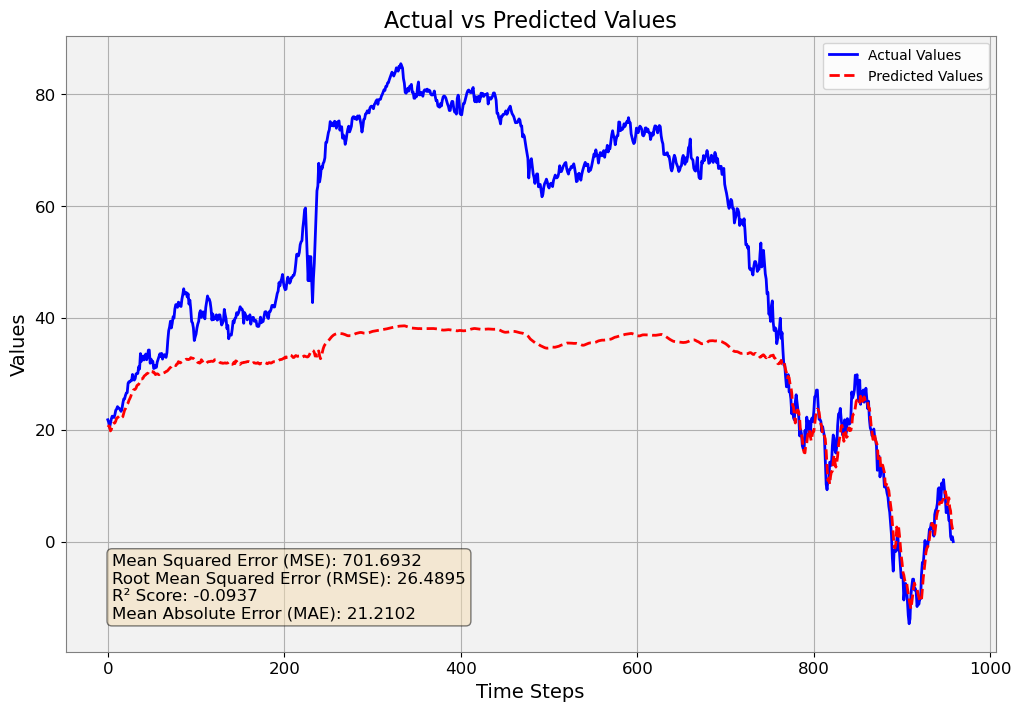

In [74]:
plot_predictions_with_metrics(y_test, y_preds)

In [104]:
import sklearn

In [105]:
scaler = sklearn.preprocessing.MinMaxScaler()

In [119]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [120]:
# Example usage:
input_shape = 10  # Number of timesteps
model, att_model = create_network(input_shape, use_attention=True)

In [121]:
model.fit(X_train_scaled, 
          y_train, 
          epochs=10, 
          batch_size=32, 
          validation_split = 0.2, 
          shuffle=True)

Epoch 1/10
56/56 [==============================] - 4s 29ms/step - loss: 23.9304 - val_loss: 202.0370
Epoch 2/10
56/56 [==============================] - 1s 18ms/step - loss: 11.8519 - val_loss: 171.9470
Epoch 3/10
56/56 [==============================] - 1s 18ms/step - loss: 8.8097 - val_loss: 134.9525
Epoch 4/10
56/56 [==============================] - 1s 17ms/step - loss: 7.9936 - val_loss: 102.9636
Epoch 5/10
56/56 [==============================] - 1s 17ms/step - loss: 7.6679 - val_loss: 74.1667
Epoch 6/10
56/56 [==============================] - 1s 17ms/step - loss: 7.5560 - val_loss: 60.3563
Epoch 7/10
56/56 [==============================] - 1s 17ms/step - loss: 7.5752 - val_loss: 45.9995
Epoch 8/10
56/56 [==============================] - 1s 17ms/step - loss: 6.9405 - val_loss: 38.6086
Epoch 9/10
56/56 [==============================] - 1s 17ms/step - loss: 6.5791 - val_loss: 20.5919
Epoch 10/10
56/56 [==============================] - 1s 17ms/step - loss: 6.6023 - val_loss: 1

In [122]:
y_preds = model.predict(X_test)

30/30 [==============================] - 1s 5ms/step


In [123]:
# scaler.inverse_transform(y_preds)

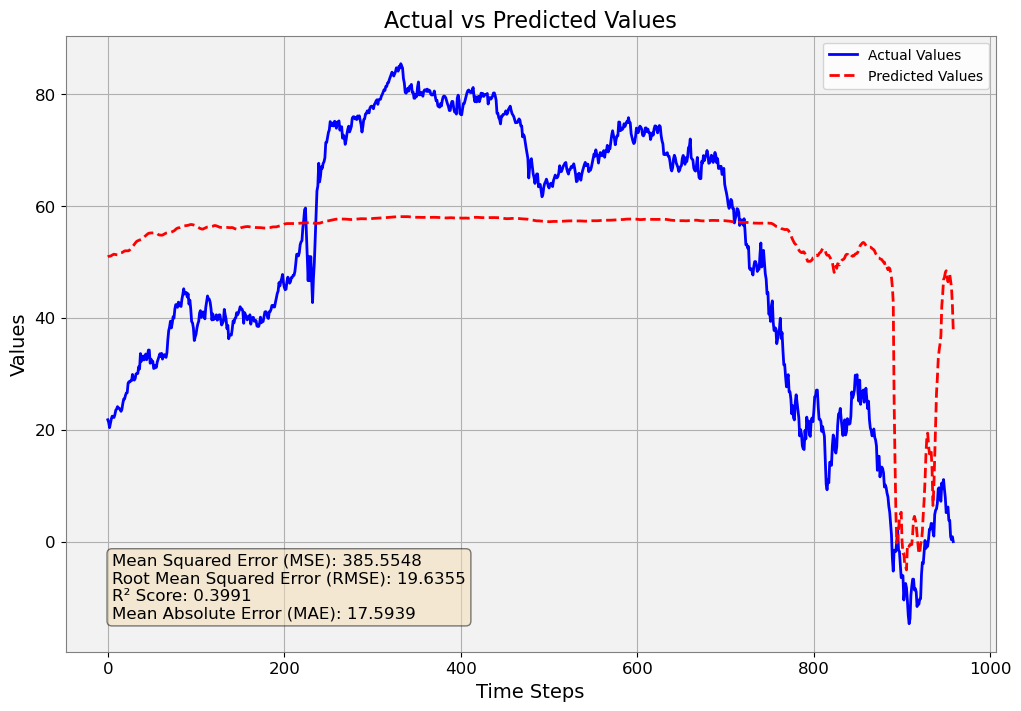

In [124]:
plot_predictions_with_metrics(y_test, y_preds)

V2

In [65]:
# https://www.kaggle.com/code/tboyle10/lstm-attention

In [75]:
class Attention(Layer):
    def __init__(self, step_dim,
                 W_regularizer=None, b_regularizer=None,
                 W_constraint=None, b_constraint=None,
                 bias=True, **kwargs):
        self.supports_masking = True
        self.init = initializers.get('glorot_uniform')

        self.W_regularizer = regularizers.get(W_regularizer)
        self.b_regularizer = regularizers.get(b_regularizer)

        self.W_constraint = constraints.get(W_constraint)
        self.b_constraint = constraints.get(b_constraint)

        self.bias = bias
        self.step_dim = step_dim
        self.features_dim = 0
        super(Attention, self).__init__(**kwargs)

    def build(self, input_shape):
        assert len(input_shape) == 3
        self.W = self.add_weight(shape=(input_shape[-1],),
                                 initializer=self.init,
                                 regularizer=self.W_regularizer,
                                 constraint=self.W_constraint,
                                 name='{}_W'.format(self.name))
        self.features_dim = input_shape[-1]

        if self.bias:
            self.b = self.add_weight(shape=(input_shape[1],),
                                     initializer='zeros',
                                     regularizer=self.b_regularizer,
                                     constraint=self.b_constraint,
                                     name='{}_b'.format(self.name))
        else:
            self.b = None
        self.built = True

    def compute_mask(self, input, input_mask=None):
        return None

    def call(self, x, mask=None):
        features_dim = self.features_dim
        step_dim = self.step_dim
        eij = K.reshape(K.dot(K.reshape(x, (-1, features_dim)),
                        K.reshape(self.W, (features_dim, 1))), (-1, step_dim))
        if self.bias:
            eij += self.b
        eij = K.tanh(eij)
        a = K.exp(eij)
        if mask is not None:
            a *= K.cast(mask, K.floatx())
        a /= K.cast(K.sum(a, axis=1, keepdims=True) + K.epsilon(), K.floatx())
        a = K.expand_dims(a)
        weighted_input = x * a
        return K.sum(weighted_input, axis=1)

    def compute_output_shape(self, input_shape):
        return input_shape[0],  self.features_dim

In [76]:
def define_model(input_shape):
    inputs = Input(shape=(input_shape, 1))
    
    x = LSTM(128, activation='relu', return_sequences=True)(inputs)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = LSTM(64, activation='relu', return_sequences=True)(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Attention(input_shape)(x)

    x = Dense(16, activation='relu')(x)
    x = BatchNormalization()(x)
    x = Dropout(0.2)(x)
    
    x = Dense(1)(x)
    
    model = Model(inputs=inputs, outputs=x)
    
    optimizer = Adam(learning_rate=0.001)
    model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
    model.summary()
    
    return model

In [77]:
input_shape = 10
model = define_model(input_shape)  

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 10, 1)]           0         
                                                                 
 lstm_8 (LSTM)               (None, 10, 128)           66560     
                                                                 
 batch_normalization_5 (Bat  (None, 10, 128)           512       
 chNormalization)                                                
                                                                 
 dropout_5 (Dropout)         (None, 10, 128)           0         
                                                                 
 lstm_9 (LSTM)               (None, 10, 64)            49408     
                                                                 
 batch_normalization_6 (Bat  (None, 10, 64)            256       
 chNormalization)                                          

In [78]:
model.fit(X_train, 
          y_train, 
          epochs=20, 
          batch_size=32, 
          validation_split = 0.2, 
          shuffle=True)

Epoch 1/20
56/56 [==============================] - 3s 14ms/step - loss: 185.4473 - mse: 185.4473 - val_loss: 154.7217 - val_mse: 154.7217
Epoch 2/20
56/56 [==============================] - 0s 8ms/step - loss: 161.6751 - mse: 161.6751 - val_loss: 148.0142 - val_mse: 148.0142
Epoch 3/20
56/56 [==============================] - 0s 8ms/step - loss: 143.6914 - mse: 143.6914 - val_loss: 137.6955 - val_mse: 137.6955
Epoch 4/20
56/56 [==============================] - 0s 8ms/step - loss: 127.2237 - mse: 127.2237 - val_loss: 146.4370 - val_mse: 146.4370
Epoch 5/20
56/56 [==============================] - 0s 8ms/step - loss: 110.4367 - mse: 110.4367 - val_loss: 121.3109 - val_mse: 121.3109
Epoch 6/20
56/56 [==============================] - 0s 8ms/step - loss: 94.6639 - mse: 94.6639 - val_loss: 138.7108 - val_mse: 138.7108
Epoch 7/20
56/56 [==============================] - 0s 8ms/step - loss: 80.4834 - mse: 80.4834 - val_loss: 110.9273 - val_mse: 110.9273
Epoch 8/20
56/56 [===================

In [79]:
y_preds = model.predict(X_test)

30/30 [==============================] - 0s 3ms/step


In [80]:
y_preds[0,:]

array([18.786127], dtype=float32)

In [81]:
y_preds.shape

(959, 1)

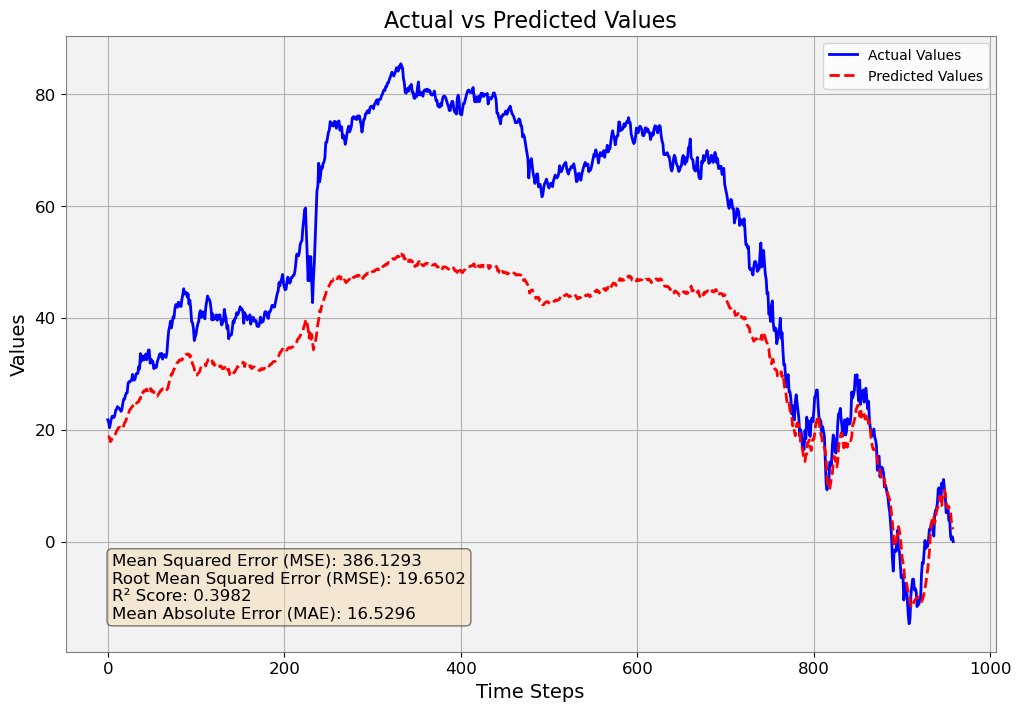

In [82]:
plot_predictions_with_metrics(y_test, y_preds)

xLSTM

In [505]:
# !pip install PyxLSTM

In [83]:
import torch
from xLSTM.model import xLSTM
# from xLSTM.data import LanguageModelingDataset, Tokenizer
# from xLSTM.utils import load_config, set_seed, get_device
# from xLSTM.training import train  # Assuming train function is defined in training module

In [84]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class CausalConv1D(nn.Module):
    def __init__(self, in_channels, out_channels, kernel_size, dilation=1, **kwargs):
        super(CausalConv1D, self).__init__()
        self.padding = (kernel_size - 1) * dilation
        self.conv = nn.Conv1d(in_channels, out_channels, kernel_size, padding=self.padding, dilation=dilation, **kwargs)

    def forward(self, x):
        x = self.conv(x)
        return x[:, :, :-self.padding]

class BlockDiagonal(nn.Module):
    def __init__(self, in_features, out_features, num_blocks):
        super(BlockDiagonal, self).__init__()
        self.in_features = in_features
        self.out_features = out_features
        self.num_blocks = num_blocks

        assert in_features % num_blocks == 0
        assert out_features % num_blocks == 0
        
        block_in_features = in_features // num_blocks
        block_out_features = out_features // num_blocks
        
        self.blocks = nn.ModuleList([
            nn.Linear(block_in_features, block_out_features)
            for _ in range(num_blocks)
        ])
        
    def forward(self, x):
        x = x.chunk(self.num_blocks, dim=-1)
        x = [block(x_i) for block, x_i in zip(self.blocks, x)]
        x = torch.cat(x, dim=-1)
        return x

class sLSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, proj_factor=4/3):
        super(sLSTMBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_size = hidden_size // num_heads
        self.proj_factor = proj_factor

        assert hidden_size % num_heads == 0
        assert proj_factor > 0

        self.layer_norm = nn.LayerNorm(input_size)
        self.causal_conv = CausalConv1D(1, 1, 4)

        self.Wz = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wi = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wf = BlockDiagonal(input_size, hidden_size, num_heads)
        self.Wo = BlockDiagonal(input_size, hidden_size, num_heads)

        self.Rz = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Ri = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Rf = BlockDiagonal(hidden_size, hidden_size, num_heads)
        self.Ro = BlockDiagonal(hidden_size, hidden_size, num_heads)

        self.group_norm = nn.GroupNorm(num_heads, hidden_size)

        self.up_proj_left = nn.Linear(hidden_size, int(hidden_size * proj_factor))
        self.up_proj_right = nn.Linear(hidden_size, int(hidden_size * proj_factor))
        self.down_proj = nn.Linear(int(hidden_size * proj_factor), input_size)

    def forward(self, x, prev_state):
        assert x.size(-1) == self.input_size
        h_prev, c_prev, n_prev, m_prev = prev_state
        x_norm = self.layer_norm(x)
        x_conv = F.silu(self.causal_conv(x_norm.unsqueeze(1)).squeeze(1))

        z = torch.tanh(self.Wz(x) + self.Rz(h_prev))
        o = torch.sigmoid(self.Wo(x) + self.Ro(h_prev))
        i_tilde = self.Wi(x_conv) + self.Ri(h_prev)
        f_tilde = self.Wf(x_conv) + self.Rf(h_prev)

        m_t = torch.max(f_tilde + m_prev, i_tilde)
        i = torch.exp(i_tilde - m_t)
        f = torch.exp(f_tilde + m_prev - m_t)

        c_t = f * c_prev + i * z
        n_t = f * n_prev + i
        h_t = o * c_t / n_t

        output = h_t
        output_norm = self.group_norm(output)
        output_left = self.up_proj_left(output_norm)
        output_right = self.up_proj_right(output_norm)
        output_gated = F.gelu(output_right)
        output = output_left * output_gated
        output = self.down_proj(output)
        final_output = output + x

        return final_output, (h_t, c_t, n_t, m_t)

class sLSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, num_layers=1, batch_first=False, proj_factor=4/3):
        super(sLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.proj_factor_slstm = proj_factor

        self.layers = nn.ModuleList([sLSTMBlock(input_size, hidden_size, num_heads, proj_factor) for _ in range(num_layers)])

    def forward(self, x, state=None):
        assert x.ndim == 3
        if self.batch_first:
            x = x.transpose(0, 1)
        seq_len, batch_size, _ = x.size()
        
        if state is not None:
            state = torch.stack(list(state))
            assert state.ndim == 4
            num_hidden, state_num_layers, state_batch_size, state_input_size = state.size()
            assert num_hidden == 4
            assert state_num_layers == self.num_layers
            assert state_batch_size == batch_size
            assert state_input_size == self.input_size
            state = state.transpose(0, 1)
        else:
            state = torch.zeros(self.num_layers, 4, batch_size, self.hidden_size)

        output = []
        for t in range(seq_len):
            x_t = x[t]
            for layer in range(self.num_layers):
                x_t, state_tuple = self.layers[layer](x_t, tuple(state[layer].clone()))
                state[layer] = torch.stack(list(state_tuple))
            output.append(x_t)
        
        output = torch.stack(output)
        if self.batch_first:
            output = output.transpose(0, 1)
        state = tuple(state.transpose(0, 1))
        return output, state

class mLSTMBlock(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, proj_factor=2):
        super(mLSTMBlock, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.head_size = hidden_size // num_heads
        self.proj_factor = proj_factor

        assert hidden_size % num_heads == 0
        assert proj_factor > 0

        self.layer_norm = nn.LayerNorm(input_size)
        self.up_proj_left = nn.Linear(input_size, int(input_size * proj_factor))
        self.up_proj_right = nn.Linear(input_size, hidden_size)
        self.down_proj = nn.Linear(hidden_size, input_size)

        self.causal_conv = CausalConv1D(1, 1, 4)
        self.skip_connection = nn.Linear(int(input_size * proj_factor), hidden_size)

        self.Wq = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wk = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wv = BlockDiagonal(int(input_size * proj_factor), hidden_size, num_heads)
        self.Wi = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.Wf = nn.Linear(int(input_size * proj_factor), hidden_size)
        self.Wo = nn.Linear(int(input_size * proj_factor), hidden_size)

        self.group_norm = nn.GroupNorm(num_heads, hidden_size)

    def forward(self, x, prev_state):
        h_prev, c_prev, n_prev, m_prev = prev_state
        assert x.size(-1) == self.input_size
        x_norm = self.layer_norm(x)
        x_up_left = self.up_proj_left(x_norm)
        x_up_right = self.up_proj_right(x_norm)

        x_conv = F.silu(self.causal_conv(x_up_left.unsqueeze(1)).squeeze(1))
        x_skip = self.skip_connection(x_conv)

        q = self.Wq(x_conv)
        k = self.Wk(x_conv) / (self.head_size ** 0.5)
        v = self.Wv(x_up_left)

        i_tilde = self.Wi(x_conv)
        f_tilde = self.Wf(x_conv)
        o = torch.sigmoid(self.Wo(x_up_left))

        m_t = torch.max(f_tilde + m_prev, i_tilde)
        i = torch.exp(i_tilde - m_t)
        f = torch.exp(f_tilde + m_prev - m_t)

        c_t = f * c_prev + i * (v * k)
        n_t = f * n_prev + i * k
        h_t = o * (c_t * q) / torch.max(torch.abs(n_t.T @ q), 1)[0]

        output = h_t
        output_norm = self.group_norm(output)
        output = output_norm + x_skip
        output = output * F.silu(x_up_right)
        output = self.down_proj(output)
        final_output = output + x

        return final_output, (h_t, c_t, n_t, m_t)

In [85]:
import torch
import torch.nn as nn

class mLSTM(nn.Module):
    # TODO: Add bias, dropout, bidirectional
    def __init__(self, input_size, hidden_size, num_heads, num_layers=1, batch_first=False, proj_factor=2):
        super(mLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.num_layers = num_layers
        self.batch_first = batch_first
        self.proj_factor_slstm = proj_factor

        self.layers = nn.ModuleList([mLSTMBlock(input_size, hidden_size, num_heads, proj_factor) for _ in range(num_layers)])

    def forward(self, x, state=None):
        assert x.ndim == 3
        if self.batch_first:
            x = x.transpose(0, 1)
        seq_len, batch_size, _ = x.size()
        
        if state is not None:
            state = torch.stack(list(state))
            assert state.ndim == 4
            num_hidden, state_num_layers, state_batch_size, state_input_size = state.size()
            assert num_hidden == 4
            assert state_num_layers == self.num_layers
            assert state_batch_size == batch_size
            assert state_input_size == self.input_size
            state = state.transpose(0, 1)
        else:
            state = torch.zeros(self.num_layers, 4, batch_size, self.hidden_size)

        output = []
        for t in range(seq_len):
            x_t = x[t]
            for layer in range(self.num_layers):
                x_t, state_tuple = self.layers[layer](x_t, tuple(state[layer].clone()))
                state[layer] = torch.stack(list(state_tuple))
            output.append(x_t)
        
        output = torch.stack(output)
        if self.batch_first:
            output = output.transpose(0, 1)
        state = tuple(state.transpose(0, 1))
        return output, state

class xLSTM(nn.Module):
    # TODO: Add bias, dropout, bidirectional
    def __init__(self, input_size, hidden_size, num_heads, layers, batch_first=False, proj_factor_slstm=4/3, proj_factor_mlstm=2):
        super(xLSTM, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.num_heads = num_heads
        self.num_layers = len(layers)
        self.batch_first = batch_first
        self.proj_factor_slstm = proj_factor_slstm
        self.proj_factor_mlstm = proj_factor_mlstm

        self.layers = nn.ModuleList()
        for layer_type in layers:
            if layer_type == 's':
                layer = sLSTMBlock(input_size, hidden_size, num_heads, proj_factor_slstm)
            elif layer_type == 'm':
                layer = mLSTMBlock(input_size, hidden_size, num_heads, proj_factor_mlstm)
            else:
                raise ValueError(f"Invalid layer type: {layer_type}. Choose 's' for sLSTM or 'm' for mLSTM.")
            self.layers.append(layer)

    def forward(self, x, state=None):
        assert x.ndim == 3
        if self.batch_first:
            x = x.transpose(0, 1)
        seq_len, batch_size, _ = x.size()
        
        if state is not None:
            state = torch.stack(list(state))
            assert state.ndim == 4
            num_hidden, state_num_layers, state_batch_size, state_input_size = state.size()
            assert num_hidden == 4
            assert state_num_layers == self.num_layers
            assert state_batch_size == batch_size
            assert state_input_size == self.input_size
            state = state.transpose(0, 1)
        else:
            state = torch.zeros(self.num_layers, 4, batch_size, self.hidden_size)

        output = []
        for t in range(seq_len):
            x_t = x[t]
            for layer in range(self.num_layers):
                x_t, state_tuple = self.layers[layer](x_t, tuple(state[layer].clone()))
                state[layer] = torch.stack(list(state_tuple))
            output.append(x_t)
        
        output = torch.stack(output)
        if self.batch_first:
            output = output.transpose(0, 1)
        state = tuple(state.transpose(0, 1))
        return output, state


In [86]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

In [87]:
# Hyperparameters
seq_length = 10
num_sequences = 1000
input_size = 10
hidden_size = 50
num_heads = 5
num_layers = 2
batch_size = 32
learning_rate = 0.001
num_epochs = 20

In [88]:
# # Generate data
# X, y = generate_sequence_data(seq_length, num_sequences)
# X = torch.tensor(X, dtype=torch.float32).unsqueeze(-1)  # Shape: (num_sequences, seq_length, input_size)
# y = torch.tensor(y, dtype=torch.float32).unsqueeze(-1)  # Shape: (num_sequences, seq_length, input_size)

In [89]:
X_train_ = torch.tensor(X_train, dtype=torch.float32).unsqueeze(-1)  # Shape: (num_sequences, seq_length, input_size)
y_train_ = torch.tensor(y_train, dtype=torch.float32).unsqueeze(-1) 

In [90]:
# Dataset and DataLoader
dataset = torch.utils.data.TensorDataset(X_train_, y_train_)
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

In [91]:
# Define the xLSTM model
class SequenceModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_heads, num_layers):
        super(SequenceModel, self).__init__()
        self.xlstm = xLSTM(input_size, hidden_size, num_heads, ['s', 'm'], batch_first=True)
        self.fc = nn.Linear(hidden_size, 1)

    def forward(self, x, state=None):
        output, state = self.xlstm(x, state)
        output = self.fc(output)
        return output, state

In [92]:
# Initialize the model, loss function, and optimizer
model = SequenceModel(input_size, hidden_size, num_heads, num_layers)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [93]:
# # Training loop
# for epoch in range(num_epochs):
#     model.train()
#     for batch_x, batch_y in dataloader:
#         optimizer.zero_grad()
#         output, _ = model(batch_x)
#         loss = criterion(output, batch_y)
#         loss.backward()
#         optimizer.step()
    
#     print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}')

In [94]:
# # Evaluation on a sample sequence
# model.eval()
# with torch.no_grad():
#     sample_input = torch.tensor(np.sin(np.linspace(0, np.pi, seq_length)).reshape(1, -1, 1), dtype=torch.float32)
#     predicted_output, _ = model(sample_input)
#     print("Input sequence:", sample_input.squeeze().numpy())
#     print("Predicted next value:", predicted_output.squeeze().numpy())

Transformer

In [95]:
# https://towardsdatascience.com/how-to-use-transformer-networks-to-build-a-forecasting-model-297f9270e630

In [96]:
import torch
import torch.nn as nn


In [97]:
# encoder_layer = nn.TransformerEncoderLayer(
#     d_model=channels,
#     nhead=8,
#     dropout=self.dropout,
#     dim_feedforward=4 * channels,
# )
# decoder_layer = nn.TransformerDecoderLayer(
#     d_model=channels,
#     nhead=8,
#     dropout=self.dropout,
#     dim_feedforward=4 * channels,
# )

# # self.encoder = torch.nn.TransformerEncoder(encoder_layer, num_layers=8)
# # self.decoder = torch.nn.TransformerDecoder(decoder_layer, num_layers=8)

In [98]:
# https://towardsdatascience.com/how-to-use-transformer-networks-to-build-a-forecasting-model-297f9270e630
# https://www.kaggle.com/code/pankajvaluence/time-series-forecasting-lstm-fbprophet-transformer

In [99]:
import torch
import torch.nn as nn

class MyTransformerModel(nn.Module):
    def __init__(self, channels, dropout):
        super(MyTransformerModel, self).__init__()
        self.dropout = dropout
        
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=channels,
            nhead=8,
            dropout=self.dropout,
            dim_feedforward=4 * channels,
        )
        decoder_layer = nn.TransformerDecoderLayer(
            d_model=channels,
            nhead=8,
            dropout=self.dropout,
            dim_feedforward=4 * channels,
        )

        self.encoder = nn.TransformerEncoder(encoder_layer, num_layers=8)
        self.decoder = nn.TransformerDecoder(decoder_layer, num_layers=8)

    def forward(self, src, tgt, src_mask=None, tgt_mask=None, memory_mask=None):
        memory = self.encoder(src, mask=src_mask)
        output = self.decoder(tgt, memory, tgt_mask=tgt_mask, memory_mask=memory_mask)
        return output

# Example usage:
channels = 512
dropout = 0.1
model = MyTransformerModel(channels, dropout)


C:\Users\applepy\AppData\Roaming\Python\Python311\site-packages\torch\nn\modules\transformer.py:282: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


In [ ]:
# <!-- https://arxiv.org/pdf/2001.08317 -->
# https://www.kaggle.com/code/pankajvaluence/time-series-forecasting-lstm-fbprophet-transformer


In [101]:
from torch import nn, Tensor

In [102]:
class PositionalEncoder(nn.Module):
    """
    Adapted from: 
    https://pytorch.org/tutorials/beginner/transformer_tutorial.html
    https://github.com/LiamMaclean216/Pytorch-Transfomer/blob/master/utils.py 
    """

    def __init__(self, dropout: float = 0.1, max_seq_len: int = 5000, d_model: int = 512):

        """
        Args:
            dropout: the dropout rate
            max_seq_len: the maximum length of the input sequences
            d_model: The dimension of the output of sub-layers in the model 
                     (Vaswani et al, 2017)
        """

        super().__init__()

        self.d_model = d_model
        
        self.dropout = nn.Dropout(p=dropout)

        # Create constant positional encoding matrix with values 
        # dependent on position and i
        position = torch.arange(max_seq_len).unsqueeze(1)
        
        exp_input = torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        
        div_term = torch.exp(exp_input) # Returns a new tensor with the exponential of the elements of exp_input
        
        pe = torch.zeros(max_seq_len, d_model)

        pe[:, 0::2] = torch.sin(position * div_term)
        
        pe[:, 1::2] = torch.cos(position * div_term) # torch.Size([target_seq_len, dim_val])

        pe = pe.unsqueeze(0).transpose(0, 1) # torch.Size([target_seq_len, input_size, dim_val])

        # register that pe is not a model parameter
        self.register_buffer('pe', pe)
        
    def forward(self, x: Tensor) -> Tensor:
        """
        Args:
            x: Tensor, shape [batch_size, enc_seq_len, dim_val]
        """

        add = self.pe[:x.size(1), :].squeeze(1)

        x = x + add

        return self.dropout(x)


In [103]:

class TimeSeriesTransformer(nn.Module):


    def __init__(self, 
        input_size: int,
        dec_seq_len: int,
        max_seq_len: int,
        out_seq_len: int=58,
        dim_val: int=512,  
        n_encoder_layers: int=4,
        n_decoder_layers: int=4,
        n_heads: int=8,
        dropout_encoder: float=0.2, 
        dropout_decoder: float=0.2,
        dropout_pos_enc: float=0.2,
        dim_feedforward_encoder: int=2048,
        dim_feedforward_decoder: int=2048,
        ): 

        """
        Args:
            input_size: int, number of input variables. 1 if univariate.
            dec_seq_len: int, the length of the input sequence fed to the decoder
            max_seq_len: int, length of the longest sequence the model will 
                         receive. Used in positional encoding. 
            out_seq_len: int, the length of the model's output (i.e. the target
                         sequence length)
            dim_val: int, aka d_model. All sub-layers in the model produce 
                     outputs of dimension dim_val
            n_encoder_layers: int, number of stacked encoder layers in the encoder
            n_decoder_layers: int, number of stacked encoder layers in the decoder
            n_heads: int, the number of attention heads (aka parallel attention layers)
            dropout_encoder: float, the dropout rate of the encoder
            dropout_decoder: float, the dropout rate of the decoder
            dropout_pos_enc: float, the dropout rate of the positional encoder
            dim_feedforward_encoder: int, number of neurons in the linear layer 
                                     of the encoder
            dim_feedforward_decoder: int, number of neurons in the linear layer 
                                     of the decoder
        """

        super().__init__() 

        self.dec_seq_len = dec_seq_len
#         self.pe = PositionalEncoder()

        print("input_size is: {}".format(input_size))
        print("dim_val is: {}".format(dim_val))

        # Creating the three linear layers needed for the model
        self.encoder_input_layer = nn.Linear(
            in_features=input_size, 
            out_features=dim_val 
            )

        self.decoder_input_layer = nn.Linear(
            in_features=input_size, 
            out_features=dim_val 
            )  

        self.linear_mapping = nn.Linear(
            in_features=out_seq_len*dim_val,
            out_features=out_seq_len
            )

        # Create positional encoder   ###changed
        self.positional_encoding_layer = PositionalEncoder(
            d_model=dim_val,
            dropout=dropout_pos_enc,
            max_seq_len=max_seq_len
            )

        # The encoder layer used in the paper is identical to the one used by
        # Vaswani et al (2017) on which the PyTorch module is based.
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=dim_val, 
            nhead=n_heads,
            dim_feedforward=dim_feedforward_encoder,
            dropout=dropout_encoder,
            batch_first=True
            )

        # Stack the encoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerEncoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.encoder = nn.TransformerEncoder(
            encoder_layer=encoder_layer,
            num_layers=n_encoder_layers, 
            norm=None
            )

        decoder_layer = nn.TransformerDecoderLayer(
            d_model=dim_val,
            nhead=n_heads,
            dim_feedforward=dim_feedforward_decoder,
            dropout=dropout_decoder,
            batch_first=True
            )

        # Stack the decoder layers in nn.TransformerDecoder
        # It seems the option of passing a normalization instance is redundant
        # in my case, because nn.TransformerDecoderLayer per default normalizes
        # after each sub-layer
        # (https://github.com/pytorch/pytorch/issues/24930).
        self.decoder = nn.TransformerDecoder(
            decoder_layer=decoder_layer,
            num_layers=n_decoder_layers, 
            norm=None
            )

    def forward(self, src: Tensor, tgt: Tensor, src_mask: Tensor=None, 
                tgt_mask: Tensor=None) -> Tensor:
        """
        Args:
            src: the encoder's output sequence. Shape: (S,E) for unbatched input, 
                 (S, N, E) if batch_first=False or (N, S, E) if 
                 batch_first=True, where S is the source sequence length, 
                 N is the batch size, and E is the feature number
            tgt: the sequence to the decoder. Shape: (T,E) for unbatched input, 
                 (T, N, E)(T,N,E) if batch_first=False or (N, T, E) if 
                 batch_first=True, where T is the target sequence length, 
                 N is the batch size, E is the feature number.
            src_mask: the mask for the src sequence to prevent the model from 
                      using data points from the target sequence
            tgt_mask: the mask for the tgt sequence to prevent the model from
                      using data points from the target sequence
        """

        # Pass throguh the input layer right before the encoder
        src = self.encoder_input_layer(src)

        # Pass through the positional encoding layer
        src = self.positional_encoding_layer(src)

        # Pass through all the stacked encoder layers in the encoder
        # Masking is only needed in the encoder if input sequences are padded
        # which they are not in this time series use case, because all my
        # input sequences are naturally of the same length. 
        # (https://github.com/huggingface/transformers/issues/4083)
        src = self.encoder(
            src=src
            )

        # Pass decoder input through decoder input layer
        decoder_output = self.decoder_input_layer(tgt)

        # Pass throguh decoder
        decoder_output = self.decoder(
            tgt=decoder_output,
            memory=src,
            tgt_mask=tgt_mask,
            memory_mask=src_mask
            )

        # Pass through the linear mapping layer
        decoder_output= self.linear_mapping(decoder_output.flatten(start_dim=1))

        return decoder_output


CNN

NBEATS

In [126]:
# !pip install nbeats-pytorch numpy torch

In [127]:
from nbeats_pytorch.model import NBeatsNet
import torch
import numpy as np

# Define hyperparameters
input_length = 30
output_length = 10
num_blocks = 3
num_layers = 4
layer_width = 256

# Initialize N-BEATS model
model = NBeatsNet(
    device='cpu',  # or 'cuda'
    stack_types=(NBeatsNet.GENERIC_BLOCK, NBeatsNet.GENERIC_BLOCK),
    forecast_length=output_length,
    backcast_length=input_length,
    thetas_dim=(4, 4),
    nb_blocks_per_stack=num_blocks,
    share_weights_in_stack=False,
    hidden_layer_units=layer_width
)

# Optimizer
optimizer = torch.optim.Adam(model.parameters())


| N-Beats
| --  Stack Generic (#0) (share_weights_in_stack=False)
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2355508098896
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2355456177552
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2353960758224
| --  Stack Generic (#1) (share_weights_in_stack=False)
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2353960796944
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2353960759568
     | -- GenericBlock(units=256, thetas_dim=4, backcast_length=30, forecast_length=10, share_thetas=False) at @2353960760720


In [130]:
# def create_sequences(data, input_length, output_length):
#     X, y = [], []
#     for i in range(len(data) - input_length - output_length):
#         X.append(data[i:i + input_length])
#         y.append(data[i + input_length:i + input_length + output_length])
#     return np.array(X), np.array(y)

# # Split the data into training and test sets
# train_size = int(len(time_series_data) * 0.8)
# train_data = time_series_data[:train_size]
# test_data = time_series_data[train_size:]

# # Create sequences
# X_train, y_train = create_sequences(train_data, input_length, output_length)
# X_test, y_test = create_sequences(test_data, input_length, output_length)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32)


In [132]:
# def train_model(model, X_train, y_train, optimizer, epochs=100, batch_size=32):
#     model.train()
#     loss_fn = torch.nn.MSELoss()
#     for epoch in range(epochs):
#         permutation = torch.randperm(X_train.size()[0])
#         for i in range(0, X_train.size()[0], batch_size):
#             indices = permutation[i:i + batch_size]
#             batch_X, batch_y = X_train[indices], y_train[indices]
#             optimizer.zero_grad()
#             forecast, backcast = model(batch_X)
#             loss = loss_fn(forecast, batch_y)
#             loss.backward()
#             optimizer.step()
#         print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss.item()}')

# # Train the model
# train_model(model, X_train, y_train, optimizer)

In [146]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Add
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt

def nbeats_block(input_layer, units, expansion_coefficient_dim, block_type='trend'):
    """ Create an N-BEATS block """
    x = Dense(units, activation='relu')(input_layer)
    x = Dense(units, activation='relu')(x)
    x = Dense(units, activation='relu')(x)
    x = Dense(units, activation='relu')(x)

    if block_type == 'trend':
        backcast = Dense(expansion_coefficient_dim, activation='linear')(x)
        forecast = Dense(expansion_coefficient_dim, activation='linear')(x)
    elif block_type == 'seasonality':
        backcast = Dense(expansion_coefficient_dim, activation='sigmoid')(x)
        forecast = Dense(expansion_coefficient_dim, activation='sigmoid')(x)
    else:
        raise ValueError("block_type must be either 'trend' or 'seasonality'")

    return backcast, forecast

def create_nbeats_model(input_dim, output_dim, num_blocks=3, units=256, block_type='trend'):
    """ Create the N-BEATS model """
    inputs = Input(shape=(input_dim,))
    backcast, forecast = nbeats_block(inputs, units, input_dim, block_type)

    for _ in range(num_blocks - 1):
        residual = Add()([inputs, backcast])
        backcast, block_forecast = nbeats_block(residual, units, input_dim, block_type)
        forecast = Add()([forecast, block_forecast])

    model = Model(inputs, forecast)
    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

    return model

# Example usage:
input_length = 10
output_length = 10
num_blocks = 3
units = 256

model = create_nbeats_model(input_length, output_length, num_blocks=num_blocks, units=units)

print("Model summary:")
model.summary()

# Example: Preparing data
def create_sequences(data, input_length, output_length):
    X, y = [], []
    for i in range(len(data) - input_length - output_length):
        X.append(data[i:i + input_length])
        y.append(data[i + input_length:i + input_length + output_length])
    return np.array(X), np.array(y)

time_series_data = np.random.rand(1000)  # Replace with your actual time series data

# Split the data into training and test sets
train_size = int(len(time_series_data) * 0.8)
train_data = time_series_data[:train_size]
test_data = time_series_data[train_size:]

# Create sequences
X_train, y_train = create_sequences(train_data, input_length, output_length)
X_test, y_test = create_sequences(test_data, input_length, output_length)


Model summary:
Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_10 (InputLayer)       [(None, 10)]                 0         []                            
                                                                                                  
 dense_68 (Dense)            (None, 256)                  2816      ['input_10[0][0]']            
                                                                                                  
 dense_69 (Dense)            (None, 256)                  65792     ['dense_68[0][0]']            
                                                                                                  
 dense_70 (Dense)            (None, 256)                  65792     ['dense_69[0][0]']            
                                                                            

In [147]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2)

Epoch 1/50
20/20 [==============================] - 2s 13ms/step - loss: 0.1186 - val_loss: 0.0851
Epoch 2/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0916 - val_loss: 0.0821
Epoch 3/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0876 - val_loss: 0.0822
Epoch 4/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0852 - val_loss: 0.0811
Epoch 5/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0831 - val_loss: 0.0828
Epoch 6/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0824 - val_loss: 0.0824
Epoch 7/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0813 - val_loss: 0.0821
Epoch 8/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0784 - val_loss: 0.0828
Epoch 9/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0756 - val_loss: 0.0840
Epoch 10/50
20/20 [==============================] - 0s 5ms/step - loss: 0.0744 - val_loss: 0.0842
Epoch 11/50
20/20 

6/6 [==============================] - 0s 2ms/step


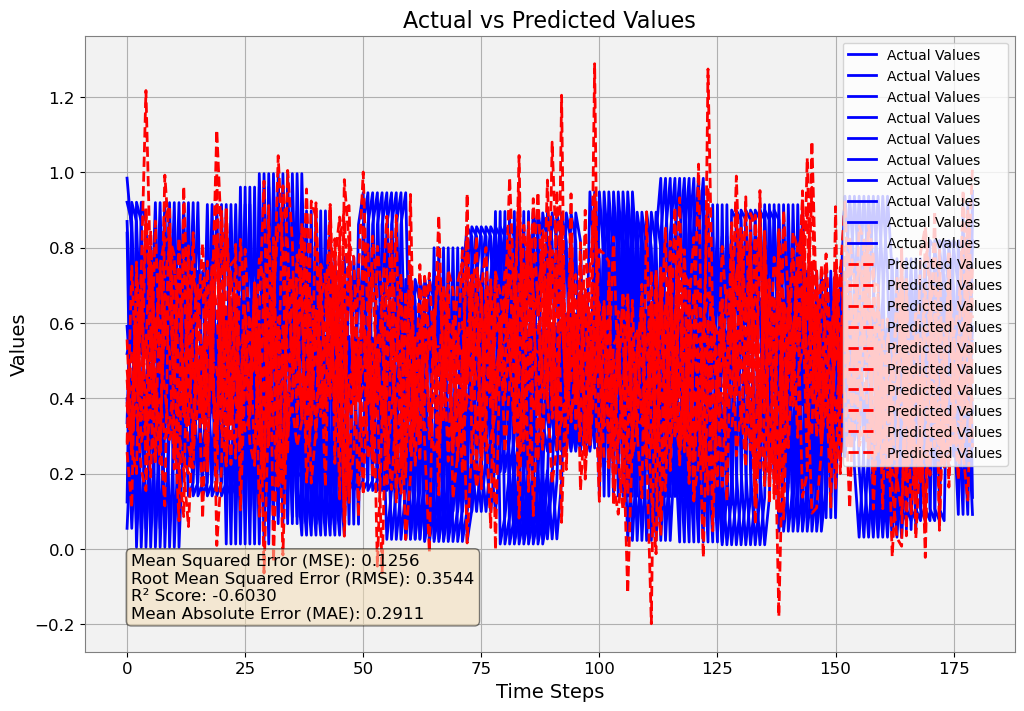

In [148]:
y_preds = model.predict(X_test)
plot_predictions_with_metrics(y_test, y_preds)

In [ ]:
# # Evaluate the model
# loss = model.evaluate(X_test, y_test)
# print(f'Test Loss: {loss}')

# # Plot predictions
# def plot_predictions(model, X_test, y_test, num_predictions=100):
#     y_preds = model.predict(X_test[:num_predictions])

#     plt.figure(figsize=(12, 6))
#     for i in range(num_predictions):
#         plt.plot(range(i, i + output_length), y_preds[i], color='red')
#         plt.plot(range(i, i + output_length), y_test[i], color='blue')
#     plt.title('N-BEATS Predictions')
#     plt.xlabel('Time Steps')
#     plt.ylabel('Values')
#     plt.legend(['Predicted', 'Actual'])
#     plt.show()

# # Plot the predictions
# plot_predictions(model, X_test, y_test)